In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
!ls "gdrive/My Drive"


 4_5839220966210667668.cpp.gdoc     'qat-vkfi-bcs - Mar 8, 2021.gjam'
'Colab Notebooks'		    'Untitled document.gdoc'
'Getting started.pdf'		    'Untitled spreadsheet.gsheet'
'Google Keep Document.gdoc'	    'ایده زبان تخصصی.gdoc'
'hgj-qzuf-opn - Jan 4, 2021.gjam'   'ایده سایت.gdoc'
'lتحلیل بنیادی.pdf'		    'ایده سمینار هوش.gdoc'
'Minx3 os.pdf'			    'انسان خردمند.pdf'
'New Text Document.gdoc'	    'اینستاگرام!'
'NN Projects'			    'حساب دیفرانسیل و انتگرال-سیلورمن.pdf'
 Pic				    'کارگاه اول.gdoc'
'pics.zip (Unzipped Files)'	    'کارگاه دوم.gdoc'
'Presentationدانش آموزان .pdf.pdf'  'محتوای سمینار پزشکی.gdoc'


In [6]:


path = "/content/drive/MyDrive/NN Projects/proj1ml/"


# import zipfile
# zip_ref = zipfile.ZipFile(path + "data.zip", 'r')
# zip_ref.extractall(path )
# zip_ref.close()

In [10]:
pd.set_option('display.max_columns', None)
path = "/content/drive/MyDrive/NN Projects/proj1ml/"
df = pd.read_csv(path + "immo_data.csv")
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [12]:
df.columns[((df.isna().sum()/len(df)) > 0.50)]


Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [13]:
df = df.drop(columns=df.columns[((df.isna().sum()/len(df)) > 0.50)])
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'date'],
      dtype='object')

In [14]:
df[df['livingSpace'] == 0.0].shape[0]


75

In [15]:
df[df['livingSpace'] == 0.0].index


Int64Index([  3444,   6601,  11127,  15014,  17278,  18433,  20165,  27339,
             30124,  30982,  33083,  33595,  34612,  35630,  40629,  63174,
             67648,  69577,  70482,  71569,  75213,  77146,  77381,  78489,
             86437,  91491,  92982,  93073,  94343,  97255, 106586, 115056,
            115921, 119028, 119150, 119711, 120544, 120972, 124278, 132002,
            135088, 137334, 138819, 140420, 141794, 142114, 145902, 151681,
            153600, 162195, 165063, 169929, 175135, 182693, 186918, 187186,
            195037, 199402, 203713, 208913, 213220, 219914, 223897, 228138,
            228960, 229099, 231174, 232236, 238489, 243369, 247111, 248599,
            254055, 266160, 267604],
           dtype='int64')

In [16]:
df = df.drop(df[df['livingSpace'] == 0.0].index)
df.shape


(268775, 42)

In [17]:
df = df.drop(df[df['totalRent'] == 0.0].index)
df.shape

(268544, 42)

In [18]:
df.head()


,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,96107057,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,111378734,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,113147523,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,108890903,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20


In [19]:
df['date'].value_counts()


Feb20    79213
May19    75957
Oct19    66594
Sep18    46780
Name: date, dtype: int64

In [20]:
df = df.drop(columns=['facilities','description','livingSpaceRange','scoutId','street','streetPlain','houseNumber','date'])


In [21]:
df._get_numeric_data().mean()


serviceCharge             151.227420
newlyConst                  0.078795
balcony                     0.616748
picturecount                9.791271
pricetrend                  3.390026
telekomUploadSpeed         28.808085
totalRent                 902.268665
yearConstructed          1966.411388
hasKitchen                  0.342603
cellar                      0.640588
yearConstructedRange        3.715457
baseRent                  694.394653
livingSpace                74.378458
lift                        0.235697
baseRentRange               3.766437
geo_plz                 37287.142074
noRooms                     2.641139
thermalChar               114.725740
floor                       2.122786
numberOfFloors              3.574554
noRoomsRange                2.571493
garden                      0.196191
dtype: float64

In [22]:
df.fillna(df._get_numeric_data().mean(),inplace = True)


In [23]:
df.isna().sum()


regio1                       0
serviceCharge                0
heatingType              44828
telekomTvOffer           32580
newlyConst                   0
balcony                      0
picturecount                 0
pricetrend                   0
telekomUploadSpeed           0
totalRent                    0
yearConstructed              0
firingTypes              56915
hasKitchen                   0
geo_bln                      0
cellar                       0
yearConstructedRange         0
baseRent                     0
livingSpace                  0
geo_krs                      0
condition                68333
interiorQual            112489
petsAllowed             114400
lift                         0
baseRentRange                0
typeOfFlat               36594
geo_plz                      0
noRooms                      0
thermalChar                  0
floor                        0
numberOfFloors               0
noRoomsRange                 0
garden                       0
regio2  

In [24]:
for cols in df.columns:
    print(df[cols].dtype)


object
float64
object
object
bool
bool
int64
float64
float64
float64
float64
object
bool
object
bool
float64
float64
float64
object
object
object
object
bool
int64
object
int64
float64
float64
float64
float64
int64
bool
object
object


In [25]:
print('col mean : ' ,df['serviceCharge'].mean())
print('col std : ' ,df['serviceCharge'].std())

upper_range = df['serviceCharge'].mean() + 3 * df['serviceCharge'].std()
print('upper range : ',upper_range)
lower_range = df['serviceCharge'].mean() - 3 * df['serviceCharge'].std()
print('lower range : ',lower_range)

col mean :  151.22741958044435
col std :  304.46828396749567
upper range :  1064.6322714829314
lower range :  -762.1774323220427


In [26]:
df[(df['serviceCharge'] > upper_range) | (df['serviceCharge'] < lower_range)]


,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio2,regio3
1311,Hessen,1150.0,central_heating,ONE_YEAR_FREE,False,False,8,4.07,40.000000,200.000000,1966.411388,natural_gas_light,False,Hessen,False,3.715457,950.00,120.00,Main_Taunus_Kreis,well_kept,normal,no,False,6,maisonette,65439,4.0,166.80000,2.122786,3.000000,4,False,Main_Taunus_Kreis,Flörsheim_am_Main
1648,Hessen,1200.0,central_heating,ONE_YEAR_FREE,True,True,3,5.10,40.000000,902.268665,2019.000000,gas,True,Hessen,True,9.000000,10000.00,440.00,Frankfurt_am_Main,first_time_use,luxury,negotiable,True,9,apartment,60487,8.5,114.72574,1.000000,4.000000,5,False,Frankfurt_am_Main,Bockenheim
4733,Berlin,1290.0,floor_heating,ONE_YEAR_FREE,False,True,22,5.91,40.000000,5705.000000,2011.000000,district_heating,True,Berlin,True,8.000000,4415.00,260.00,Berlin,mint_condition,NaN,NaN,True,9,other,10117,3.0,63.80000,2.122786,7.000000,3,False,Berlin,Mitte_Mitte
14123,Hessen,1400.0,self_contained_central_heating,ONE_YEAR_FREE,False,True,2,5.13,40.000000,13400.000000,1900.000000,gas,False,Hessen,False,1.000000,12000.00,600.00,Frankfurt_am_Main,negotiable,luxury,negotiable,True,9,maisonette,60322,15.0,114.72574,4.000000,5.000000,5,False,Frankfurt_am_Main,Westend_Nord
14591,Berlin,2150.0,central_heating,NaN,False,True,25,6.22,28.808085,6985.000000,2010.000000,NaN,True,Berlin,True,7.000000,4835.00,310.00,Berlin,mint_condition,NaN,NaN,True,9,apartment,10117,5.0,63.80000,0.000000,7.000000,5,False,Berlin,Mitte_Mitte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251364,Sachsen_Anhalt,6045.0,NaN,NaN,False,False,5,2.49,28.808085,6343.070000,1964.000000,NaN,False,Sachsen_Anhalt,False,2.000000,251.57,46.50,Magdeburg,NaN,NaN,NaN,False,1,NaN,39124,2.0,80.20000,1.000000,3.574554,2,False,Magdeburg,Neue_Neustadt
263502,Niedersachsen,9999.0,central_heating,NaN,False,True,13,4.27,28.808085,902.268665,1989.000000,gas,True,Niedersachsen,True,4.000000,9999.00,97.60,Hannover_Kreis,fully_renovated,NaN,NaN,False,9,terraced_flat,30966,3.0,100.00000,0.000000,2.000000,3,True,Hannover_Kreis,Hemmingen
265489,Nordrhein_Westfalen,1350.0,central_heating,NaN,False,False,10,4.84,28.808085,902.268665,2017.000000,district_heating,False,Nordrhein_Westfalen,True,9.000000,4995.00,243.42,Köln,mint_condition,luxury,no,True,9,apartment,50670,3.0,54.00000,1.000000,14.000000,3,False,Köln,Altstadt_&_Neustadt_Nord
266809,Berlin,2100.0,gas_heating,ONE_YEAR_FREE,False,True,25,6.15,10.000000,11100.000000,1920.000000,gas,True,Berlin,True,1.000000,9000.00,520.00,Berlin,refurbished,sophisticated,negotiable,False,9,maisonette,14109,11.0,253.00000,2.122786,3.574554,5,True,Berlin,Wannsee_Zehlendorf


In [27]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

In [28]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('column : ',cols)
        print(df[cols].value_counts().head(1))

column :  regio1
Nordrhein_Westfalen    60590
Name: regio1, dtype: int64
column :  heatingType
central_heating    123962
Name: heatingType, dtype: int64
column :  telekomTvOffer
ONE_YEAR_FREE    218571
Name: telekomTvOffer, dtype: int64
column :  newlyConst
False    237876
Name: newlyConst, dtype: int64
column :  balcony
True    159377
Name: balcony, dtype: int64
column :  firingTypes
gas    106460
Name: firingTypes, dtype: int64
column :  hasKitchen
False    170970
Name: hasKitchen, dtype: int64
column :  geo_bln
Nordrhein_Westfalen    60590
Name: geo_bln, dtype: int64
column :  cellar
True    166012
Name: cellar, dtype: int64
column :  geo_krs
Leipzig    13411
Name: geo_krs, dtype: int64
column :  condition
well_kept    64421
Name: condition, dtype: int64
column :  interiorQual
normal    79371
Name: interiorQual, dtype: int64
column :  petsAllowed
negotiable    88192
Name: petsAllowed, dtype: int64
column :  lift
False    198064
Name: lift, dtype: int64
column :  typeOfFlat
apartment

In [29]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print(df[cols].value_counts().head(1).index[0])

Nordrhein_Westfalen
central_heating
ONE_YEAR_FREE
False
True
gas
False
Nordrhein_Westfalen
True
Leipzig
well_kept
normal
negotiable
False
apartment
False
Leipzig
Innenstadt


In [30]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} , value : {}'.format(cols , df[cols].value_counts().head(1).index[0]))
        df[cols].fillna(df[cols].value_counts().head(1).index[0],inplace = True)

cols : regio1 , value : Nordrhein_Westfalen
cols : heatingType , value : central_heating
cols : telekomTvOffer , value : ONE_YEAR_FREE
cols : newlyConst , value : False
cols : balcony , value : True
cols : firingTypes , value : gas
cols : hasKitchen , value : False
cols : geo_bln , value : Nordrhein_Westfalen
cols : cellar , value : True
cols : geo_krs , value : Leipzig
cols : condition , value : well_kept
cols : interiorQual , value : normal
cols : petsAllowed , value : negotiable
cols : lift , value : False
cols : typeOfFlat , value : apartment
cols : garden , value : False
cols : regio2 , value : Leipzig
cols : regio3 , value : Innenstadt


In [31]:
df.isna().sum()


regio1                  0
serviceCharge           0
heatingType             0
telekomTvOffer          0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
firingTypes             0
hasKitchen              0
geo_bln                 0
cellar                  0
yearConstructedRange    0
baseRent                0
livingSpace             0
geo_krs                 0
condition               0
interiorQual            0
petsAllowed             0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
thermalChar             0
floor                   0
numberOfFloors          0
noRoomsRange            0
garden                  0
regio2                  0
regio3                  0
dtype: int64

In [32]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} , unique values : {}'.format(cols,df[cols].nunique()))

cols : regio1 , unique values : 16
cols : heatingType , unique values : 13
cols : telekomTvOffer , unique values : 3
cols : newlyConst , unique values : 2
cols : balcony , unique values : 2
cols : firingTypes , unique values : 130
cols : hasKitchen , unique values : 2
cols : geo_bln , unique values : 16
cols : cellar , unique values : 2
cols : geo_krs , unique values : 419
cols : condition , unique values : 10
cols : interiorQual , unique values : 4
cols : petsAllowed , unique values : 3
cols : lift , unique values : 2
cols : typeOfFlat , unique values : 10
cols : garden , unique values : 2
cols : regio2 , unique values : 419
cols : regio3 , unique values : 8593


In [33]:
df = df.drop(columns=['firingTypes','geo_krs','regio2','regio3','geo_bln'])
df.shape

(258253, 29)

In [34]:
df['regio1'].value_counts()*100/len(df)


Nordrhein_Westfalen       23.461489
Sachsen                   21.993162
Bayern                     8.026238
Sachsen_Anhalt             7.645216
Hessen                     6.620252
Niedersachsen              6.198186
Baden_Württemberg          5.992960
Thüringen                  3.186410
Rheinland_Pfalz            3.139944
Berlin                     3.075279
Brandenburg                2.612554
Mecklenburg_Vorpommern     2.509942
Schleswig_Holstein         2.488258
Hamburg                    1.397467
Bremen                     1.121768
Saarland                   0.530875
Name: regio1, dtype: float64

In [35]:
def edit_regio1(x):
    if x in ['Hamburg','Bremen','Saarland']:
        return 'other'
    else:
        return x
    
df['regio1_edit'] = df['regio1'].apply(edit_regio1)
df = df.drop(columns = ['regio1'])


In [36]:
df['regio1_edit'].value_counts()*100/len(df)


Nordrhein_Westfalen       23.461489
Sachsen                   21.993162
Bayern                     8.026238
Sachsen_Anhalt             7.645216
Hessen                     6.620252
Niedersachsen              6.198186
Baden_Württemberg          5.992960
Thüringen                  3.186410
Rheinland_Pfalz            3.139944
Berlin                     3.075279
other                      3.050110
Brandenburg                2.612554
Mecklenburg_Vorpommern     2.509942
Schleswig_Holstein         2.488258
Name: regio1_edit, dtype: float64

In [37]:
df['heatingType'].value_counts()*100 / len(df)


central_heating                   64.857717
district_heating                   9.245198
gas_heating                        7.442702
self_contained_central_heating     6.910278
floor_heating                      6.536613
oil_heating                        1.870646
heat_pump                          1.030385
combined_heat_and_power_plant      0.739585
night_storage_heater               0.496800
wood_pellet_heating                0.357401
electric_heating                   0.333394
stove_heating                      0.117714
solar_heating                      0.061568
Name: heatingType, dtype: float64

In [38]:
list(df['heatingType'].value_counts().tail(8).index)


['oil_heating',
 'heat_pump',
 'combined_heat_and_power_plant',
 'night_storage_heater',
 'wood_pellet_heating',
 'electric_heating',
 'stove_heating',
 'solar_heating']

In [39]:
others = list(df['heatingType'].value_counts().tail(8).index)
def edit_heating(x):
    if x in others:
        return 'other'
    else:
        return x

df['heatingType_edit'] = df['heatingType'].apply(edit_heating)
df = df.drop(columns = ['heatingType'])
df['heatingType_edit'].value_counts()*100 / len(df)

central_heating                   64.857717
district_heating                   9.245198
gas_heating                        7.442702
self_contained_central_heating     6.910278
floor_heating                      6.536613
other                              5.007493
Name: heatingType_edit, dtype: float64

In [40]:
df['condition'].value_counts()


well_kept                             130308
refurbished                            26022
fully_renovated                        25332
first_time_use                         21037
mint_condition                         20837
modernized                             16463
first_time_use_after_refurbishment     14775
negotiable                              2170
need_of_renovation                      1305
ripe_for_demolition                        4
Name: condition, dtype: int64

In [41]:
list(df['condition'].value_counts().tail(4).index)


['first_time_use_after_refurbishment',
 'negotiable',
 'need_of_renovation',
 'ripe_for_demolition']

In [42]:
others = list(df['condition'].value_counts().tail(4).index)

def edit_condition(x):
    if x in others:
        return 'other'
    else:
        return x
    
df['condition_edit'] = df['condition'].apply(edit_condition)
df = df.drop(columns=['condition'])
df['condition_edit'].value_counts()

well_kept          130308
refurbished         26022
fully_renovated     25332
first_time_use      21037
mint_condition      20837
other               18254
modernized          16463
Name: condition_edit, dtype: int64

In [43]:
df['typeOfFlat'].value_counts()


apartment              161549
roof_storey             33565
ground_floor            30432
other                    9140
maisonette               8708
raised_ground_floor      5456
penthouse                3332
terraced_flat            3215
half_basement            1970
loft                      886
Name: typeOfFlat, dtype: int64

In [44]:
list(df['typeOfFlat'].value_counts().tail(2).index)


['half_basement', 'loft']

In [45]:
def edit_typeOfFlat(x):
    if x in ['half_basement', 'loft']:
        return 'half_loft'
    else:
        return x
    
df['typeOfFlat_edit'] = df['typeOfFlat'].apply(edit_typeOfFlat)
df = df.drop(columns=['typeOfFlat'])
df['typeOfFlat_edit'].value_counts()

apartment              161549
roof_storey             33565
ground_floor            30432
other                    9140
maisonette               8708
raised_ground_floor      5456
penthouse                3332
terraced_flat            3215
half_loft                2856
Name: typeOfFlat_edit, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


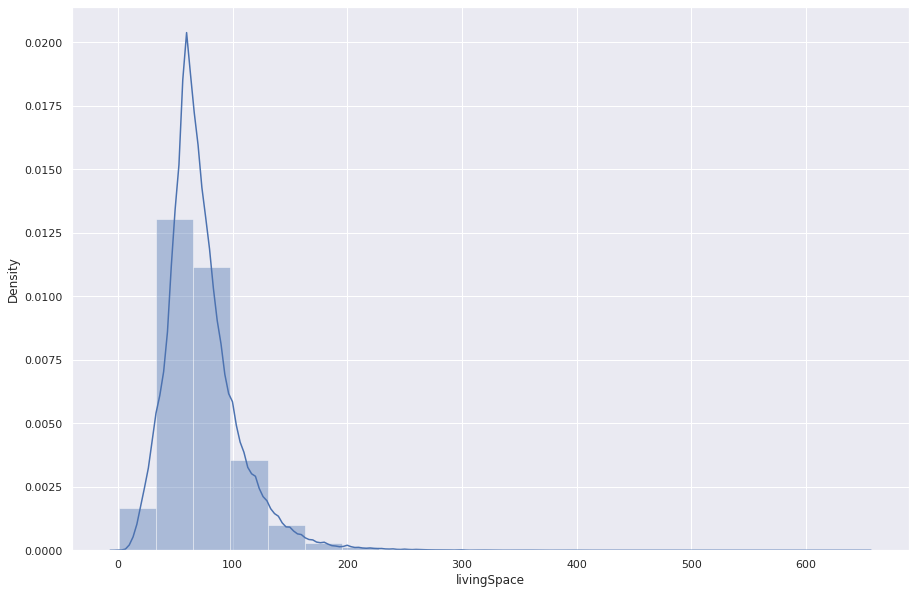

In [46]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(df['livingSpace'],kde_kws={"label": 'livingSpace'}, bins=20)

In [47]:
stats.normaltest(df["livingSpace"])

NormaltestResult(statistic=100416.61470386863, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


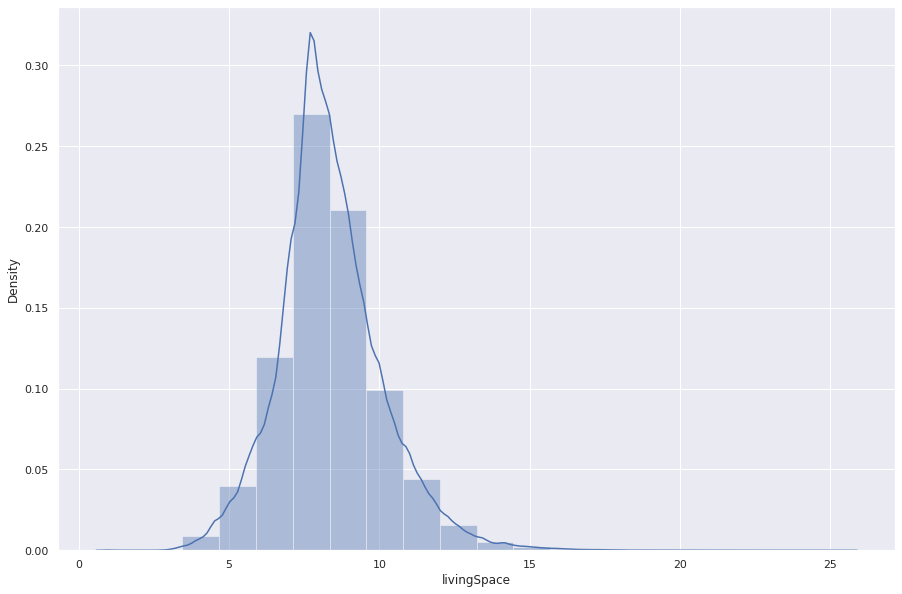

In [48]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(np.sqrt(df["livingSpace"]),kde_kws={"label": 'livingSpace'}, bins=20)

In [49]:
stats.normaltest(np.sqrt(df["livingSpace"]))


NormaltestResult(statistic=25149.3340530453, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


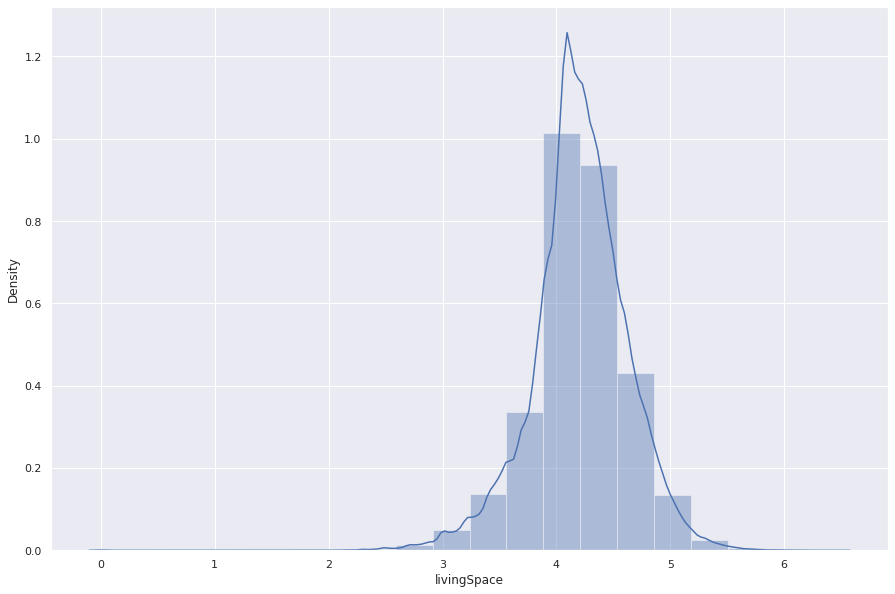

In [50]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(np.log(df["livingSpace"]),kde_kws={"label": 'livingSpace'}, bins=20)

In [51]:
stats.normaltest(np.log(df["livingSpace"]))

NormaltestResult(statistic=15722.707406757247, pvalue=0.0)

In [52]:
stats.normaltest(np.log10(df["livingSpace"]))

NormaltestResult(statistic=15722.707406757301, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


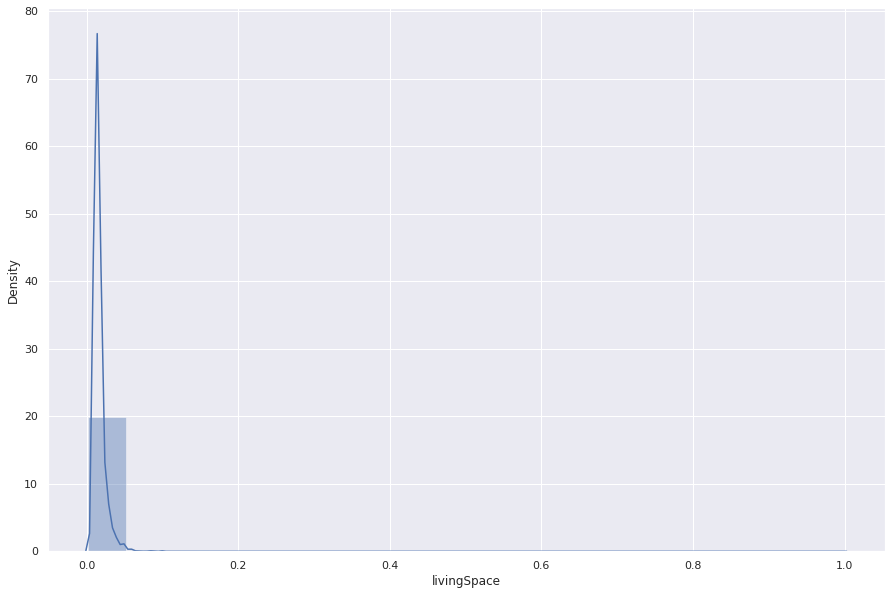

In [53]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(1/df["livingSpace"],kde_kws={"label": 'livingSpace'}, bins=20)

In [54]:
stats.normaltest(1/df["livingSpace"])

NormaltestResult(statistic=761675.6215507342, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


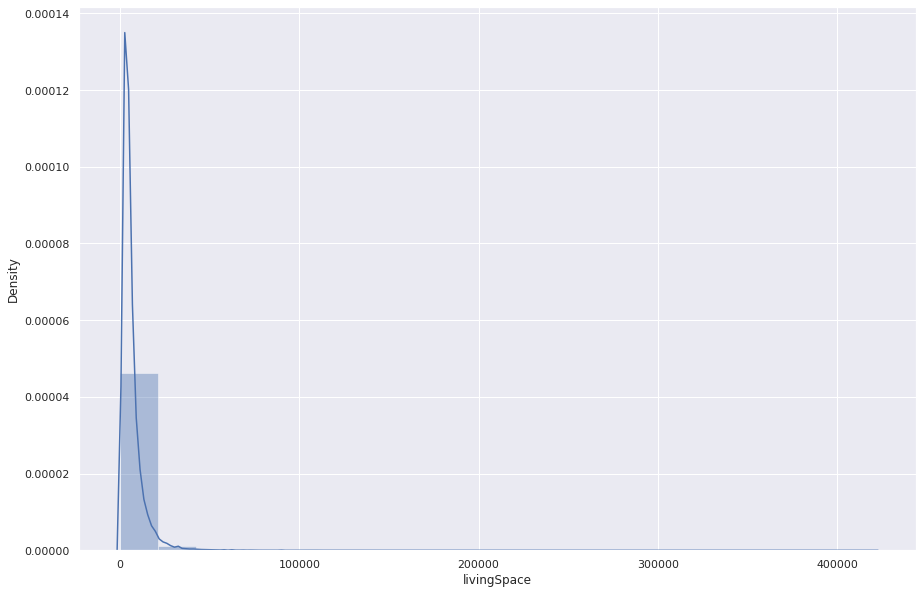

In [55]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(df["livingSpace"]**2,kde_kws={"label": 'livingSpace'}, bins=20)

In [56]:
stats.normaltest(df["livingSpace"]**2)

NormaltestResult(statistic=338461.38102759304, pvalue=0.0)

In [57]:
stats.stats.spearmanr(df['livingSpace'],df['totalRent'])

SpearmanrResult(correlation=0.670881309530835, pvalue=0.0)

In [58]:
# q2.relation between region1 and totalRent

fstat, pval = stats.f_oneway(*[df.totalRent[df.regio1_edit == s]
for s in df.regio1_edit.unique()])
print("Oneway Anova totalRent ~ edit region1 F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova totalRent ~ edit region1 F=3903.59, p-value=0.000000E+00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


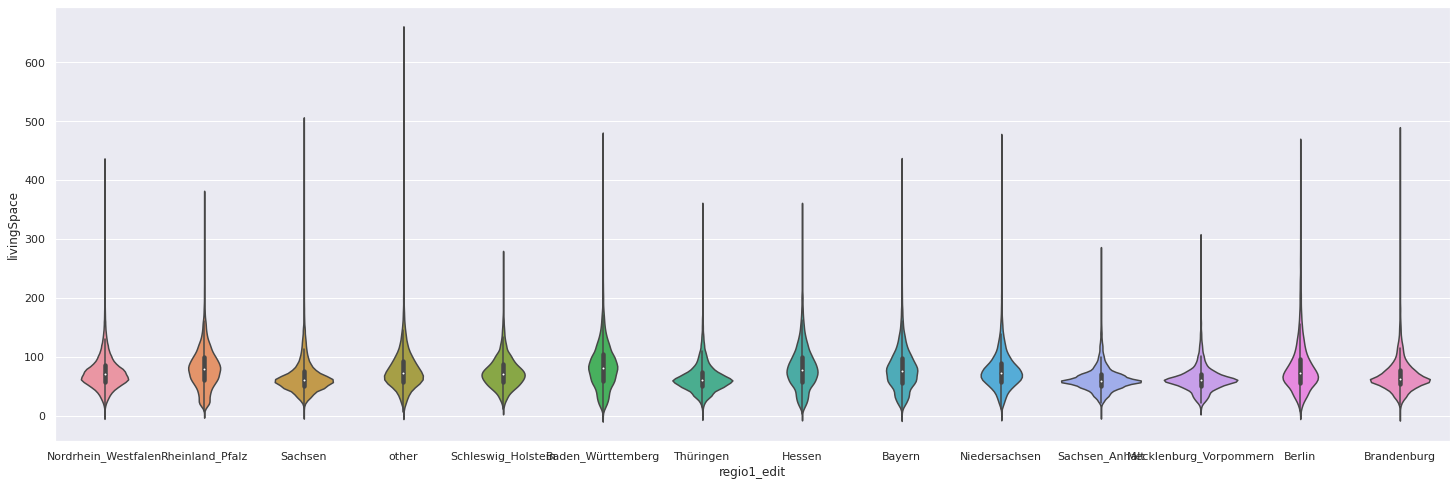

In [59]:
plt.figure(figsize=(25,8))
sns.violinplot("regio1_edit", "livingSpace", data=df)

In [60]:
#q3  independence of having serviceCharge and havingKitchen

def edit(x):
    if x == 0.0:
        return 0
    else:
        return 1
    
df['has_serviceCharge'] = df['serviceCharge'].apply(edit)
stats.chi2_contingency(df[['has_serviceCharge',"livingSpace"]])

(50370.422139266404, 1.0, 258252, array([[ 1.16137496, 85.83862504],
        [ 1.20142237, 88.79857763],
        [ 1.13200686, 83.66799314],
        ...,
        [ 1.2815172 , 94.7184828 ],
        [ 0.94778876, 70.05221124],
        [ 1.04123272, 76.95876728]]))

In [61]:
#q4 realation between having serviceCharge and livingSpace

stats.pointbiserialr(df['has_serviceCharge'],df["livingSpace"])

PointbiserialrResult(correlation=0.055706369977531166, pvalue=1.4326633713854854e-176)

In [62]:
del df['has_serviceCharge']


In [63]:
#q5 in Berlin relation hasKitchen and totalRent
berlin_df = df[df['regio1_edit'] == 'Berlin']
berlin_df.head()

,serviceCharge,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,interiorQual,petsAllowed,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio1_edit,heatingType_edit,condition_edit,typeOfFlat_edit
45,320.00,ONE_YEAR_FREE,False,True,10,4.99,28.808085,1140.00,1966.411388,True,False,3.715457,820.00,77.00,normal,negotiable,True,6,13591,3.0,114.72574,0.0,3.0,3,False,Berlin,central_heating,well_kept,ground_floor
61,79.00,ONE_YEAR_FREE,False,False,17,7.35,40.000000,955.00,1918.000000,False,False,1.000000,808.00,62.63,normal,negotiable,False,6,13086,2.0,100.40000,0.0,3.0,2,False,Berlin,central_heating,refurbished,ground_floor
77,150.00,ONE_YEAR_FREE,True,True,15,6.60,40.000000,1300.00,2019.000000,True,True,9.000000,1150.00,46.40,luxury,no,True,7,10179,2.0,114.72574,3.0,5.0,2,False,Berlin,floor_heating,first_time_use,apartment
86,228.78,ONE_YEAR_FREE,False,True,2,8.63,28.808085,1428.78,2017.000000,True,True,9.000000,1200.00,67.00,sophisticated,negotiable,True,7,10963,2.5,114.72574,6.0,7.0,2,False,Berlin,floor_heating,mint_condition,apartment
87,147.08,ONE_YEAR_FREE,True,True,9,7.56,40.000000,1559.05,2019.000000,True,True,9.000000,1338.43,73.54,sophisticated,negotiable,True,7,10557,2.0,66.20000,0.0,6.0,2,False,Berlin,district_heating,first_time_use,ground_floor


In [64]:
stats.ttest_ind(berlin_df['hasKitchen'],berlin_df['totalRent'])

Ttest_indResult(statistic=-134.4330047744755, pvalue=0.0)

In [65]:
#q6 test is mean of living space is 60
stats.ttest_1samp(berlin_df['livingSpace'],popmean = 60)

Ttest_1sampResult(statistic=44.80151287755178, pvalue=0.0)

In [66]:
del berlin_df


In [67]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        if cols != 'livingSpace':
            df[cols] = ((df[cols] - df[cols].mean())/(df[cols].std()))

In [68]:
df.head()


,serviceCharge,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,interiorQual,petsAllowed,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio1_edit,heatingType_edit,condition_edit,typeOfFlat_edit
0,1.182582,ONE_YEAR_FREE,False,False,-0.616843,0.697705,-1.234871,0.043970,-0.088681,False,True,-0.716696,-0.083932,86.00,normal,negotiable,False,0.126976,0.248967,1.423003,1.917976,-0.787933,-0.371019,1.539847,True,Nordrhein_Westfalen,central_heating,well_kept,ground_floor
1,-0.182054,ONE_YEAR_FREE,False,True,-0.258971,0.079133,-1.234871,0.162040,-2.876077,False,False,-1.129778,0.333799,89.00,normal,no,False,0.582635,1.082717,0.392039,0.063039,0.036360,0.049512,0.466722,False,Rheinland_Pfalz,self_contained_central_heating,refurbished,ground_floor
2,1.305523,ONE_YEAR_FREE,True,True,-0.258971,-0.324284,-1.734516,0.916191,1.512589,False,True,2.174881,0.670021,83.80,sophisticated,negotiable,True,1.038294,-1.303195,0.392039,0.063039,0.680365,0.360908,0.466722,False,Sachsen,floor_heating,first_time_use,apartment
3,-1.114555,ONE_YEAR_FREE,False,True,-0.080034,-0.964373,0.737411,0.162040,-0.118334,False,False,-0.716696,-0.597435,58.15,normal,negotiable,False,-0.784342,-0.997523,0.392039,-0.736137,0.680365,0.049512,0.466722,False,Sachsen,district_heating,well_kept,other
4,-0.132878,ONE_YEAR_FREE,False,True,1.709328,-0.464136,0.001624,0.163426,-0.533478,False,False,-1.129778,0.262479,84.97,normal,negotiable,False,0.582635,-0.328294,0.392039,2.126633,-0.787933,0.049512,0.466722,False,other,self_contained_central_heating,refurbished,apartment


In [69]:
df.describe()


,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange
count,2.582530e+05,2.582530e+05,2.582530e+05,2.582530e+05,2.582530e+05,2.582530e+05,2.582530e+05,2.582530e+05,258253.000000,2.582530e+05,2.582530e+05,2.582530e+05,2.582530e+05,2.582530e+05,2.582530e+05,2.582530e+05
mean,-2.834846e-14,1.503008e-14,2.279464e-13,-2.412092e-12,-8.502470e-13,7.364835e-11,-7.863597e-13,-1.722068e-15,72.988794,-5.523028e-15,1.866997e-15,7.437212e-15,-3.929933e-12,1.284564e-12,5.227225e-12,-4.755904e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,31.161360,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.829452e+00,-1.690460e+00,-3.115930e+00,-1.826556e+00,-1.546886e+00,-3.736018e+00,-1.129778e+00,-1.296369e+00,1.000000,-1.240001e+00,-1.312004e+00,-1.669889e+00,-3.125951e+00,-2.256232e+00,-2.566799e+00,-1.679528e+00
25%,-6.615204e-01,-6.168430e-01,-7.277015e-01,-1.234871e+00,-6.177804e-01,-2.665999e-01,-7.166955e-01,-6.137362e-01,54.000000,-7.843420e-01,-1.014529e+00,-6.389251e-01,-4.273247e-01,-7.879331e-01,-3.710189e-01,-6.064032e-01
50%,-1.274683e-01,-8.003431e-02,2.534358e-02,7.374110e-01,-1.608123e-01,-4.682897e-02,-8.070468e-03,-3.080798e-01,67.000000,-3.286830e-01,5.305936e-02,3.920390e-01,6.303895e-02,-5.378393e-02,4.951228e-02,4.667220e-01
75%,4.203532e-01,4.567743e-01,6.439163e-01,7.374110e-01,1.620398e-01,7.119539e-01,5.225514e-01,3.134215e-01,86.000000,5.826352e-01,7.093453e-01,3.920390e-01,9.292581e-02,6.803653e-01,3.609079e-01,4.667220e-01
max,1.117147e+01,3.498690e+00,3.182754e+00,7.374110e-01,1.210381e+02,3.617962e+00,2.174881e+00,7.858183e+01,649.000000,2.405271e+00,2.252592e+00,7.608787e+00,4.074094e+00,6.553559e+00,1.060788e+01,2.612972e+00


In [70]:
corr = df.corr()


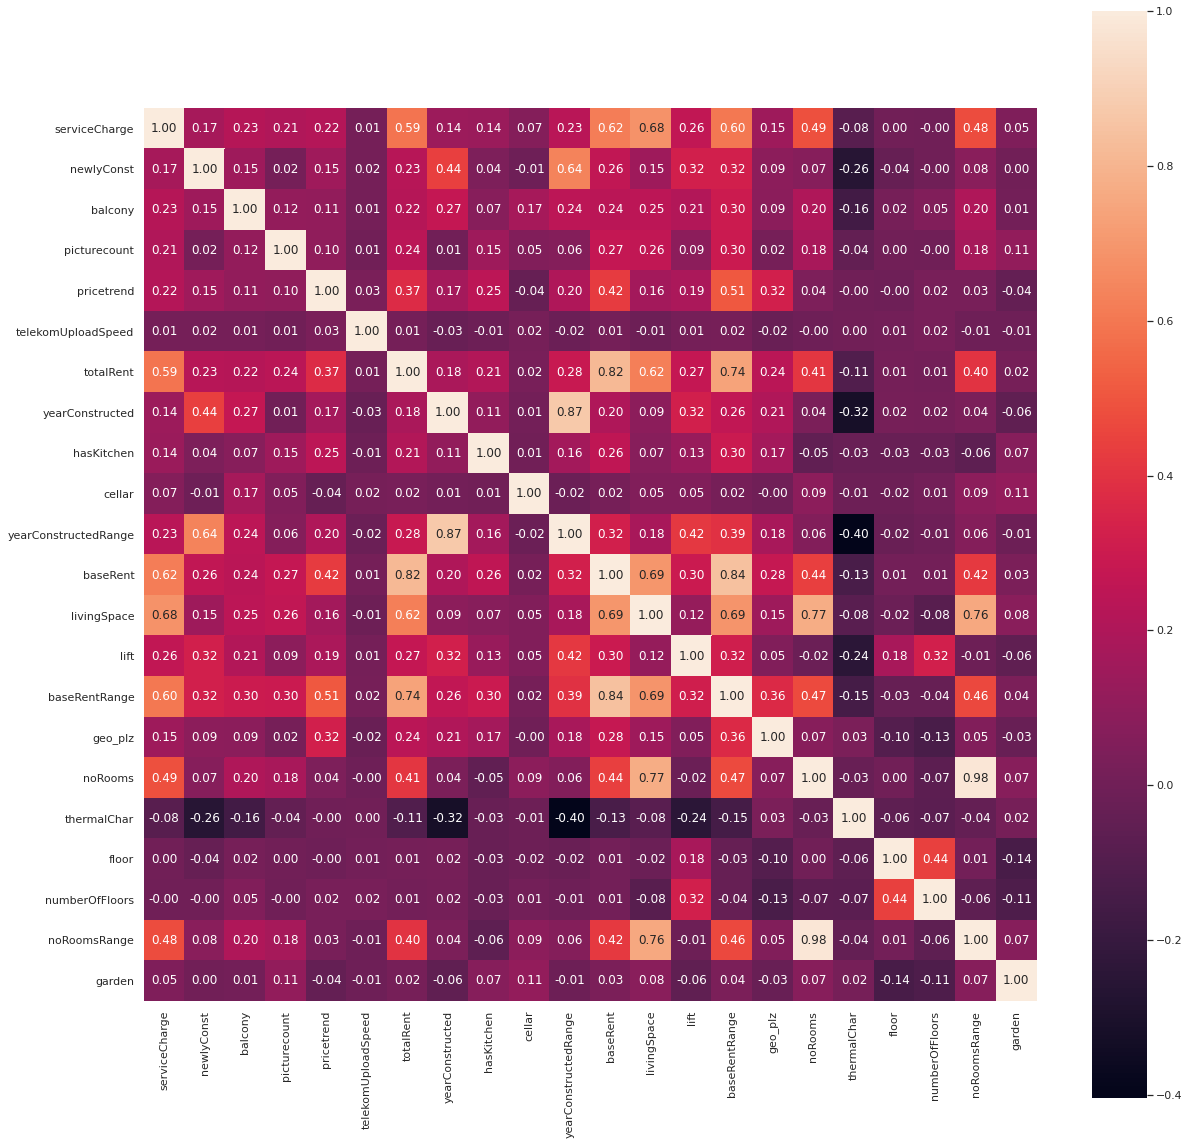

In [71]:
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr, square = True,fmt='.2f' ,annot = True)

In [72]:
columns = []
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        columns.append(cols)
        
columns

['telekomTvOffer',
 'newlyConst',
 'balcony',
 'hasKitchen',
 'cellar',
 'interiorQual',
 'petsAllowed',
 'lift',
 'garden',
 'regio1_edit',
 'heatingType_edit',
 'condition_edit',
 'typeOfFlat_edit']

In [73]:
dummies_feature = pd.get_dummies(df[columns])
dummies_feature.head()

,newlyConst,balcony,hasKitchen,cellar,lift,garden,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,regio1_edit_Baden_Württemberg,regio1_edit_Bayern,regio1_edit_Berlin,regio1_edit_Brandenburg,regio1_edit_Hessen,regio1_edit_Mecklenburg_Vorpommern,regio1_edit_Niedersachsen,regio1_edit_Nordrhein_Westfalen,regio1_edit_Rheinland_Pfalz,regio1_edit_Sachsen,regio1_edit_Sachsen_Anhalt,regio1_edit_Schleswig_Holstein,regio1_edit_Thüringen,regio1_edit_other,heatingType_edit_central_heating,heatingType_edit_district_heating,heatingType_edit_floor_heating,heatingType_edit_gas_heating,heatingType_edit_other,heatingType_edit_self_contained_central_heating,condition_edit_first_time_use,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_other,condition_edit_refurbished,condition_edit_well_kept,typeOfFlat_edit_apartment,typeOfFlat_edit_ground_floor,typeOfFlat_edit_half_loft,typeOfFlat_edit_maisonette,typeOfFlat_edit_other,typeOfFlat_edit_penthouse,typeOfFlat_edit_raised_ground_floor,typeOfFlat_edit_roof_storey,typeOfFlat_edit_terraced_flat
0,False,False,False,True,False,True,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,False,True,False,False,False,False,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,True,True,False,True,True,False,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,False,True,False,False,False,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,False,True,False,False,False,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [74]:
dummies_feature.shape


(258253, 52)

In [75]:
df = pd.concat([df, dummies_feature], axis=1)
df.head()

,serviceCharge,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,interiorQual,petsAllowed,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio1_edit,heatingType_edit,condition_edit,typeOfFlat_edit,newlyConst,balcony,hasKitchen,cellar,lift,garden,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,regio1_edit_Baden_Württemberg,regio1_edit_Bayern,regio1_edit_Berlin,regio1_edit_Brandenburg,regio1_edit_Hessen,regio1_edit_Mecklenburg_Vorpommern,regio1_edit_Niedersachsen,regio1_edit_Nordrhein_Westfalen,regio1_edit_Rheinland_Pfalz,regio1_edit_Sachsen,regio1_edit_Sachsen_Anhalt,regio1_edit_Schleswig_Holstein,regio1_edit_Thüringen,regio1_edit_other,heatingType_edit_central_heating,heatingType_edit_district_heating,heatingType_edit_floor_heating,heatingType_edit_gas_heating,heatingType_edit_other,heatingType_edit_self_contained_central_heating,condition_edit_first_time_use,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_other,condition_edit_refurbished,condition_edit_well_kept,typeOfFlat_edit_apartment,typeOfFlat_edit_ground_floor,typeOfFlat_edit_half_loft,typeOfFlat_edit_maisonette,typeOfFlat_edit_other,typeOfFlat_edit_penthouse,typeOfFlat_edit_raised_ground_floor,typeOfFlat_edit_roof_storey,typeOfFlat_edit_terraced_flat
0,1.182582,ONE_YEAR_FREE,False,False,-0.616843,0.697705,-1.234871,0.043970,-0.088681,False,True,-0.716696,-0.083932,86.00,normal,negotiable,False,0.126976,0.248967,1.423003,1.917976,-0.787933,-0.371019,1.539847,True,Nordrhein_Westfalen,central_heating,well_kept,ground_floor,False,False,False,True,False,True,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,-0.182054,ONE_YEAR_FREE,False,True,-0.258971,0.079133,-1.234871,0.162040,-2.876077,False,False,-1.129778,0.333799,89.00,normal,no,False,0.582635,1.082717,0.392039,0.063039,0.036360,0.049512,0.466722,False,Rheinland_Pfalz,self_contained_central_heating,refurbished,ground_floor,False,True,False,False,False,False,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,1.305523,ONE_YEAR_FREE,True,True,-0.258971,-0.324284,-1.734516,0.916191,1.512589,False,True,2.174881,0.670021,83.80,sophisticated,negotiable,True,1.038294,-1.303195,0.392039,0.063039,0.680365,0.360908,0.466722,False,Sachsen,floor_heating,first_time_use,apartment,True,True,False,True,True,False,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-1.114555,ONE_YEAR_FREE,False,True,-0.080034,-0.964373,0.737411,0.162040,-0.118334,False,False,-0.716696,-0.597435,58.15,normal,negotiable,False,-0.784342,-0.997523,0.392039,-0.736137,0.680365,0.049512,0.466722,False,Sachsen,district_heating,well_kept,other,False,True,False,False,False,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,-0.132878,ONE_YEAR_FREE,False,True,1.709328,-0.464136,0.001624,0.163426,-0.533478,False,False,-1.129778,0.262479,84.97,normal,negotiable,False,0.582635,-0.328294,0.392039,2.126633,-0.787933,0.049512,0.466722,False,other,self_contained_central_heating,refurbished,apartment,False,True,False,False,False,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [76]:
df = df.drop(columns=columns)
df.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,regio1_edit_Baden_Württemberg,regio1_edit_Bayern,regio1_edit_Berlin,regio1_edit_Brandenburg,regio1_edit_Hessen,regio1_edit_Mecklenburg_Vorpommern,regio1_edit_Niedersachsen,regio1_edit_Nordrhein_Westfalen,regio1_edit_Rheinland_Pfalz,regio1_edit_Sachsen,regio1_edit_Sachsen_Anhalt,regio1_edit_Schleswig_Holstein,regio1_edit_Thüringen,regio1_edit_other,heatingType_edit_central_heating,heatingType_edit_district_heating,heatingType_edit_floor_heating,heatingType_edit_gas_heating,heatingType_edit_other,heatingType_edit_self_contained_central_heating,condition_edit_first_time_use,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_other,condition_edit_refurbished,condition_edit_well_kept,typeOfFlat_edit_apartment,typeOfFlat_edit_ground_floor,typeOfFlat_edit_half_loft,typeOfFlat_edit_maisonette,typeOfFlat_edit_other,typeOfFlat_edit_penthouse,typeOfFlat_edit_raised_ground_floor,typeOfFlat_edit_roof_storey,typeOfFlat_edit_terraced_flat
0,1.182582,-0.616843,0.697705,-1.234871,0.043970,-0.088681,-0.716696,-0.083932,86.00,0.126976,0.248967,1.423003,1.917976,-0.787933,-0.371019,1.539847,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,-0.182054,-0.258971,0.079133,-1.234871,0.162040,-2.876077,-1.129778,0.333799,89.00,0.582635,1.082717,0.392039,0.063039,0.036360,0.049512,0.466722,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,1.305523,-0.258971,-0.324284,-1.734516,0.916191,1.512589,2.174881,0.670021,83.80,1.038294,-1.303195,0.392039,0.063039,0.680365,0.360908,0.466722,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-1.114555,-0.080034,-0.964373,0.737411,0.162040,-0.118334,-0.716696,-0.597435,58.15,-0.784342,-0.997523,0.392039,-0.736137,0.680365,0.049512,0.466722,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,-0.132878,1.709328,-0.464136,0.001624,0.163426,-0.533478,-1.129778,0.262479,84.97,0.582635,-0.328294,0.392039,2.126633,-0.787933,0.049512,0.466722,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [77]:
y = df['livingSpace'].values
x = df.drop(columns = ['livingSpace']).values

print(x.shape)
print(y.shape)

(258253, 61)
(258253,)


In [78]:
train_size = int(0.8 * x.shape[0])
train_size

206602

In [79]:
x_train = x[:train_size]
y_train = y[:train_size]

print(x_train.shape)
print(y_train.shape)

x_test = x[train_size:]
y_test = y[train_size:]

print(x_test.shape)
print(y_test.shape)

(206602, 61)
(206602,)
(51651, 61)
(51651,)


In [80]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
x_pca = pca.fit_transform(x)
x_pca.shape

(258253, 18)

In [81]:
x_pca_train = x_pca[:train_size]
print(x_pca_train.shape)
x_pca_test = x_pca[train_size:]
print(x_pca_test.shape)

(206602, 18)
(51651, 18)


In [82]:
x_train[:,0].shape


(206602,)

In [83]:
# Initializes parameters "w" and "b" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(61)
n = x_train.shape[0]

# Sets learning rate
lr = 0.001

# Defines number of epochs
n_epochs = 500

test_error =  y_test - np.sum((w * x_test) + b , axis = 1)
test_mse = (test_error**2).mean()           
print('init MSE : ',test_mse)
              
for epoch in range(n_epochs):
    error = y_train - np.sum((w * x_train) + b , axis = 1)
    
    if epoch % 100 == 0:    
        print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
    
    w_grad = [0] * x_train.shape[1]
    b_grad = 0
    
    for i in range(x_train.shape[1]):
        w_grad[i] = -1 * (x_train[:,i] * error).mean()
        w[i] = w[i] - (lr * w_grad[i])
        
    b_grad = -1 * error.mean()
    b = b - (lr*b_grad)
              

test_error = y_test - np.sum((w * x_test) + b , axis = 1)
test_mse = (test_error**2).mean() 
print('Final MSE : ',test_mse)

init MSE :  2864.533572022381
epoch 0 , MSE : 2846.6155515364417
epoch 100 , MSE : 602.1839163153286
epoch 200 , MSE : 412.22047341757184
epoch 300 , MSE : 322.15188707155835
epoch 400 , MSE : 276.1402746510592
Final MSE :  244.22078702705832


In [84]:
y_pred = np.sum((w * x_test) + b , axis = 1)
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

,test,pred
0,60.59,72.642983
1,63.85,66.896139
2,65.30,60.469956
3,77.70,79.202794
4,66.07,78.363092


In [85]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

74.37997328222106

In [86]:
# Initializes parameters "w" and "b" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(61)
n = x_train.shape[0]

# Sets learning rate
lr = 0.01

# Defines number of epochs
n_epochs = 500

test_error =  y_test - np.sum((w * x_test) + b , axis = 1)
test_mse = (test_error**2).mean()           
print('init MSE : ',test_mse)
              
for epoch in range(n_epochs):
    error = y_train - np.sum((w * x_train) + b , axis = 1)
    
    if epoch % 100 == 0:    
        print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
    
    w_grad = [0] * x_train.shape[1]
    b_grad = 0
    
    for i in range(x_train.shape[1]):
        w_grad[i] = -1 * (x_train[:,i] * error).mean()
        w[i] = w[i] - (lr * w_grad[i])
        
    b_grad = -1 * error.mean()
    b = b - (lr*b_grad)
              

test_error = y_test - np.sum((w * x_test) + b , axis = 1)
test_mse = (test_error**2).mean() 
print('Final MSE : ',test_mse)

init MSE :  2864.533572022381
epoch 0 , MSE : 2846.6155515364417
epoch 100 , MSE : 211.6692117847213
epoch 200 , MSE : 201.22744883910778
epoch 300 , MSE : 198.07700745123987
epoch 400 , MSE : 196.16167356993242
Final MSE :  189.41889087442718


In [87]:
y_pred = np.sum((w * x_test) + b , axis = 1)
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

,test,pred
0,60.59,67.071252
1,63.85,72.416894
2,65.30,64.696226
3,77.70,76.365242
4,66.07,81.645825


In [88]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

77.10596116241699

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Linear = LinearRegression()

In [90]:
Linear.fit(x_train,y_train)
print(Linear.coef_)
print(Linear.intercept_)

[ 6.42959370e+00  4.06229079e-01 -2.19429218e+00 -2.82513362e-01
  9.10989583e-01 -1.31499230e+00  6.90091801e-01  6.16799354e+00
  7.60939298e+00  7.44810080e-01  1.59141256e+01 -1.28676873e-02
 -1.60441236e-01 -1.01850659e+00 -1.70702711e+00  8.01688262e+10
  8.01688262e+10  8.01688262e+10  8.47028687e+11  8.47028687e+11
  8.47028687e+11  8.47028687e+11  3.36998480e+11  3.36998480e+11
  3.36998480e+11 -8.78007701e+11 -8.78007701e+11 -8.78007701e+11
 -8.78007701e+11 -8.78007701e+11 -8.78007701e+11 -8.78007701e+11
 -8.78007701e+11 -8.78007701e+11 -8.78007701e+11 -8.78007701e+11
 -8.78007701e+11 -8.78007701e+11 -8.78007701e+11 -3.13436036e+11
 -3.13436036e+11 -3.13436036e+11 -3.13436036e+11 -3.13436036e+11
 -3.13436036e+11  3.33408294e+10  3.33408294e+10  3.33408294e+10
  3.33408294e+10  3.33408294e+10  3.33408294e+10  3.33408294e+10
 -3.32451317e+11 -3.32451317e+11 -3.32451317e+11 -3.32451317e+11
 -3.32451317e+11 -3.32451317e+11 -3.32451317e+11 -3.32451317e+11
 -3.32451317e+11]
2263582

In [91]:
y_pred = Linear.predict(x_test)


In [92]:
mean_squared_error(y_pred,y_test)


179.21044699978748

In [93]:
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

,test,pred
0,60.59,68.312653
1,63.85,70.966125
2,65.30,64.768646
3,77.70,78.026367
4,66.07,81.726105


In [94]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

77.94040773653947

In [95]:
x_pca_train.shape


(206602, 18)

In [96]:
# Initializes parameters "w" and "b" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(x_pca_train.shape[1])
n = x_pca_train.shape[0]

# Sets learning rate
lr = 0.01

# Defines number of epochs
n_epochs = 500

test_error =  y_test - np.sum((w * x_pca_test) + b , axis = 1)
test_mse = (test_error**2).mean()           
print('init MSE : ',test_mse)
              
for epoch in range(n_epochs):
    error = y_train - np.sum((w * x_pca_train) + b , axis = 1)
    
    if epoch % 100 == 0:    
        print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
    
    w_grad = [0] * x_pca_train.shape[1]
    b_grad = 0
    
    for i in range(x_pca_train.shape[1]):
        w_grad[i] = -1 * (x_pca_train[:,i] * error).mean()
        w[i] = w[i] - (lr * w_grad[i])
        
    b_grad = -1 * error.mean()
    b = b - (lr*b_grad)
              

test_error = y_test - np.sum((w * x_pca_test) + b , axis = 1)
test_mse = (test_error**2).mean() 
print('Final MSE : ',test_mse)

init MSE :  5114.318076291239
epoch 0 , MSE : 5044.977261424031
epoch 100 , MSE : 204.517477437801
epoch 200 , MSE : 198.93790580630957
epoch 300 , MSE : 197.62750203158876
epoch 400 , MSE : 196.95600714334154
Final MSE :  191.4811726465628


In [97]:
y_pred = np.sum((w * x_pca_test) + b , axis = 1)
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

,test,pred
0,60.59,68.182875
1,63.85,73.256896
2,65.30,64.583441
3,77.70,75.126008
4,66.07,81.897331


In [98]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

76.98398869334572

In [99]:
df.head()


,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,regio1_edit_Baden_Württemberg,regio1_edit_Bayern,regio1_edit_Berlin,regio1_edit_Brandenburg,regio1_edit_Hessen,regio1_edit_Mecklenburg_Vorpommern,regio1_edit_Niedersachsen,regio1_edit_Nordrhein_Westfalen,regio1_edit_Rheinland_Pfalz,regio1_edit_Sachsen,regio1_edit_Sachsen_Anhalt,regio1_edit_Schleswig_Holstein,regio1_edit_Thüringen,regio1_edit_other,heatingType_edit_central_heating,heatingType_edit_district_heating,heatingType_edit_floor_heating,heatingType_edit_gas_heating,heatingType_edit_other,heatingType_edit_self_contained_central_heating,condition_edit_first_time_use,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_other,condition_edit_refurbished,condition_edit_well_kept,typeOfFlat_edit_apartment,typeOfFlat_edit_ground_floor,typeOfFlat_edit_half_loft,typeOfFlat_edit_maisonette,typeOfFlat_edit_other,typeOfFlat_edit_penthouse,typeOfFlat_edit_raised_ground_floor,typeOfFlat_edit_roof_storey,typeOfFlat_edit_terraced_flat
0,1.182582,-0.616843,0.697705,-1.234871,0.043970,-0.088681,-0.716696,-0.083932,86.00,0.126976,0.248967,1.423003,1.917976,-0.787933,-0.371019,1.539847,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,-0.182054,-0.258971,0.079133,-1.234871,0.162040,-2.876077,-1.129778,0.333799,89.00,0.582635,1.082717,0.392039,0.063039,0.036360,0.049512,0.466722,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,1.305523,-0.258971,-0.324284,-1.734516,0.916191,1.512589,2.174881,0.670021,83.80,1.038294,-1.303195,0.392039,0.063039,0.680365,0.360908,0.466722,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-1.114555,-0.080034,-0.964373,0.737411,0.162040,-0.118334,-0.716696,-0.597435,58.15,-0.784342,-0.997523,0.392039,-0.736137,0.680365,0.049512,0.466722,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,-0.132878,1.709328,-0.464136,0.001624,0.163426,-0.533478,-1.129778,0.262479,84.97,0.582635,-0.328294,0.392039,2.126633,-0.787933,0.049512,0.466722,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [100]:
X = df['noRooms'].values
X.shape

(258253,)

In [101]:
X_train = X[:train_size]
print(X_train.shape)
X_test = X[train_size:]
print(X_test.shape)

(206602,)
(51651,)


In [102]:
# Initializes parameters "w" and "b" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
n = X_train.shape[0]

# Sets learning rate
lr = 0.1

# Defines number of epochs
n_epochs = 500

test_error =  y_test - ((w * X_test) + b)
test_mse = (test_error**2).mean()           
print('init MSE : ',test_mse)
print('init learning rate : ',lr)
              
for epoch in range(n_epochs):
    error = y_train - ((w * X_train) + b)
    
    if epoch % 100 == 0:    
        print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
     
    # adoptive learning rate
    if epoch % 200 == 0:
        lr = lr * 0.1
        
    
    w_grad = 0 
    b_grad = 0
    
    w_grad = -1 * (X_train * error).mean()
    w = w - (lr * w_grad)
        
    b_grad = -1 * error.mean()
    b = b - (lr*b_grad)
              

test_error = y_test - ((w * X_test) + b)
test_mse = (test_error**2).mean() 
print('Final MSE : ',test_mse)
print('Final learning rate : ',lr)

init MSE :  6279.427436261649
init learning rate :  0.1
epoch 0 , MSE : 6221.168635240242
epoch 100 , MSE : 1172.9280553706399
epoch 200 , MSE : 495.5630475635506
epoch 300 , MSE : 476.5386639197813
epoch 400 , MSE : 460.96207637695414
Final MSE :  455.37908807328665
Final learning rate :  0.00010000000000000003


In [103]:
y_pred = (w * X_test) + b
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

,test,pred
0,60.59,62.409355
1,63.85,73.470603
2,65.30,73.470603
3,77.70,73.470603
4,66.07,73.470603


In [104]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

61.18371377127258